## Section 1: Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np


path = "E:\Case Study Data.csv"
df = pd.read_csv(path)
df.head(10)


,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"
5,"August 18, 2024, 9:32 PM",Category-76,Product-6e9c,Business-de42,Location-1ba8,1,"2,605"
6,"August 18, 2024, 9:32 PM",Category-120,Product-7864,Business-de42,Location-1ba8,1,"1,940"
7,"August 18, 2024, 9:32 PM",Category-119,Product-7940,Business-de42,Location-1ba8,4,"1,460"
8,"August 18, 2024, 9:32 PM",Category-96,Product-87b2,Business-de42,Location-1ba8,1,805
9,"August 18, 2024, 9:32 PM",Category-106,Product-c14c,Business-de42,Location-1ba8,1,"1,350"


In [2]:
df.tail(10)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
333395,"March 15, 2024, 5:31 PM",Category-78,Product-b409,Business-be40,Location-4ea1,2,750
333396,"March 15, 2024, 5:31 PM",Category-77,Product-d09c,Business-be40,Location-4ea1,2,"2,680"
333397,"March 15, 2024, 8:04 PM",Category-76,Product-e805,Business-be40,Location-4ea1,1,"6,210"
333398,"November 13, 2024, 1:59 PM",Category-121,Product-898d,Business-0e99,Location-689f,5,"1,360"
333399,"January 9, 2024, 8:49 PM",Category-97,Product-bbdc,Business-f9ff,Location-1979,1,341
333400,"January 9, 2024, 8:49 PM",Category-119,Product-e98d,Business-f9ff,Location-1979,1,"1,770"
333401,"August 20, 2024, 8:24 PM",Category-106,Product-21f4,Business-72bc,Location-689f,1,850
333402,"August 20, 2024, 8:24 PM",Category-76,Product-6e9c,Business-72bc,Location-689f,1,"2,575"
333403,"October 10, 2024, 6:19 PM",Category-91,Product-523e,Business-2693,Location-b27b,1,"1,520"
333404,"October 10, 2024, 6:19 PM",Category-75,Product-b31e,Business-2693,Location-b27b,1,"4,420"


In [3]:
df.shape

(333405, 7)

In [4]:
# Data types in our dataset

data_types = df.dtypes
data_types

DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [6]:
df.describe

<bound method NDFrame.describe of                              DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0        August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1        August 18, 2024, 9:32 PM        Category-120       Product-4156   
2        August 18, 2024, 9:32 PM        Category-121       Product-49bd   
3        August 18, 2024, 9:32 PM         Category-76       Product-61dd   
4        August 18, 2024, 9:32 PM        Category-119       Product-66e0   
...                           ...                 ...                ...   
333400   January 9, 2024, 8:49 PM        Category-119       Product-e98d   
333401   August 20, 2024, 8:24 PM        Category-106       Product-21f4   
333402   August 20, 2024, 8:24 PM         Category-76       Product-6e9c   
333403  October 10, 2024, 6:19 PM         Category-91       Product-523e   
333404  October 10, 2024, 6:19 PM         Category-75       Product-b31e   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANT

In [7]:
#checking for missing values

#df.isna().sum()

df.isnull().sum()


DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [8]:
#checking for duplicates

duplicated = df.duplicated().sum()
duplicated

3524

# Summary of Issues:

1. Data Types: The "UNIT PRICE" column is stored as a string, which needs to be converted to a numeric type for analysis.

2. Missing Values: The dataset has missing values in the "UNIT PRICE" column (8 missing values).

3. Duplicates: There are 3,524 duplicate rows in the dataset.


In [9]:
# Step 1: Remove duplicated rows

df = df.drop_duplicates()
df

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"
...,...,...,...,...,...,...,...
333398,"November 13, 2024, 1:59 PM",Category-121,Product-898d,Business-0e99,Location-689f,5,"1,360"
333401,"August 20, 2024, 8:24 PM",Category-106,Product-21f4,Business-72bc,Location-689f,1,850
333402,"August 20, 2024, 8:24 PM",Category-76,Product-6e9c,Business-72bc,Location-689f,1,"2,575"
333403,"October 10, 2024, 6:19 PM",Category-91,Product-523e,Business-2693,Location-b27b,1,"1,520"


In [10]:
# Step 2: Change dtype to_numeric
# df['UNIT PRICE'] = df['UNIT PRICE'].replace(',', '', regex=True).astype(float) works for where 
#column only contains commas with no other invalid entries

df['UNIT PRICE'] = pd.to_numeric(df['UNIT PRICE'], errors='coerce') 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\3019716281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNIT PRICE'] = pd.to_numeric(df['UNIT PRICE'], errors='coerce')


In [11]:
df.dtypes

DATE                    object
ANONYMIZED CATEGORY     object
ANONYMIZED PRODUCT      object
ANONYMIZED BUSINESS     object
ANONYMIZED LOCATION     object
QUANTITY                 int64
UNIT PRICE             float64
dtype: object

In [12]:
# Step 3: Replace Missing values in the "UNIT PRICE" column with the median
# why median? - It is more resistant to outliers and maintains consistency of data

median_price = df['UNIT PRICE'].median()

df['UNIT PRICE'] = df['UNIT PRICE'].fillna(median_price)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\3974200301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNIT PRICE'] = df['UNIT PRICE'].fillna(median_price)


In [13]:
df.isna().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

In [14]:
# Create "Month- Year" column from date

# Step 4: Create 'Month-Year' column from 'DATE'
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\3334433194.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\3334433194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\3334433194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [15]:
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,663.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,663.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,663.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,663.0,August 2024


In [16]:
# The result
print(df[['DATE', 'Month-Year']].head(10))

                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024
5 2024-08-18 21:32:00  August 2024
6 2024-08-18 21:32:00  August 2024
7 2024-08-18 21:32:00  August 2024
8 2024-08-18 21:32:00  August 2024
9 2024-08-18 21:32:00  August 2024


## Section 2: Exploratory Data Analysis

### Sales Overview

In [17]:
# Import the necessary libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1. Total Quantity and Value Grouped by Category 

In [18]:
# Calculate Value column
df['Value'] = df['QUANTITY'] * df['UNIT PRICE']

# 1. Sales by Category
category_sales = df.groupby('ANONYMIZED CATEGORY').agg({
    'QUANTITY': 'sum',
    'Value': 'sum'
}).sort_values('Value', ascending=False)

# Display results
print("Category Summary:\n", category_sales)

Category Summary:
                      QUANTITY        Value
ANONYMIZED CATEGORY                       
Category-120           169715  112662251.0
Category-75            151330  100332150.0
Category-100            76824   51108423.0
Category-76             71719   47542538.0
Category-119            68332   45304116.0
Category-77             28455   18851079.0
Category-94             23670   16751684.0
Category-85             22997   15746016.0
Category-91             20853   13195035.0
Category-101            19585   13034230.0
Category-121            14669    9924445.0
Category-78              9766    6910884.0
Category-84             11933    6798158.0
Category-92              6954    4610502.0
Category-106             6521    4397402.0
Category-111             6715    4251682.0
Category-82              4759    3930818.0
Category-110            10529    2758705.0
Category-95              4117    2573419.0
Category-108             9756    2074453.0
Category-107             2730    18

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\3762403269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = df['QUANTITY'] * df['UNIT PRICE']


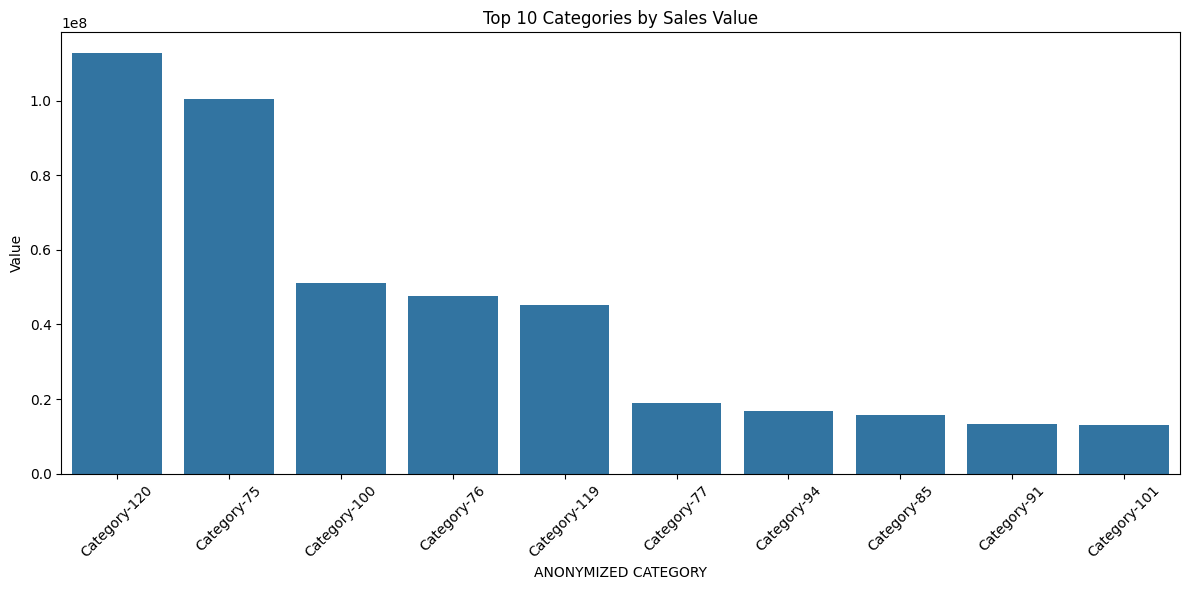

Top 10 Categories by Sales:
                     QUANTITY        Value
ANONYMIZED CATEGORY                       
Category-120           169715  112662251.0
Category-75            151330  100332150.0
Category-100            76824   51108423.0
Category-76             71719   47542538.0
Category-119            68332   45304116.0
Category-77             28455   18851079.0
Category-94             23670   16751684.0
Category-85             22997   15746016.0
Category-91             20853   13195035.0
Category-101            19585   13034230.0


In [19]:
# Bar plot for Category sales
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales.head(10), x=category_sales.head(10).index, y='Value')
plt.xticks(rotation=45)
plt.title('Top 10 Categories by Sales Value')
plt.tight_layout()
plt.show()

# Print top categories
print("\
Top 10 Categories by Sales:")
print(category_sales.head(10))

In [20]:
# Group by Category
category_summary = df.groupby('ANONYMIZED CATEGORY').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Value', 'sum')
).reset_index()

#### 2. Total Quantity and Value Grouped by Business

In [21]:
# 2. Sales by Business
business_sales = df.groupby('ANONYMIZED BUSINESS').agg({
    'QUANTITY': 'sum',
    'Value': 'sum'
}).sort_values('Value', ascending=False)

print("\nBusiness Summary:\n", business_sales)


Business Summary:
                      QUANTITY      Value
ANONYMIZED BUSINESS                     
Business-978e           13991  9071832.0
Business-6068            8214  5421044.0
Business-fe7d            6743  4464899.0
Business-7a03            6318  4105376.0
Business-07de            6065  4023545.0
...                       ...        ...
Business-8654               1       55.0
Business-c19b               1       55.0
Business-4b87               5       10.0
Business-d78d               1        2.0
Business-f712              22        0.0

[4800 rows x 2 columns]


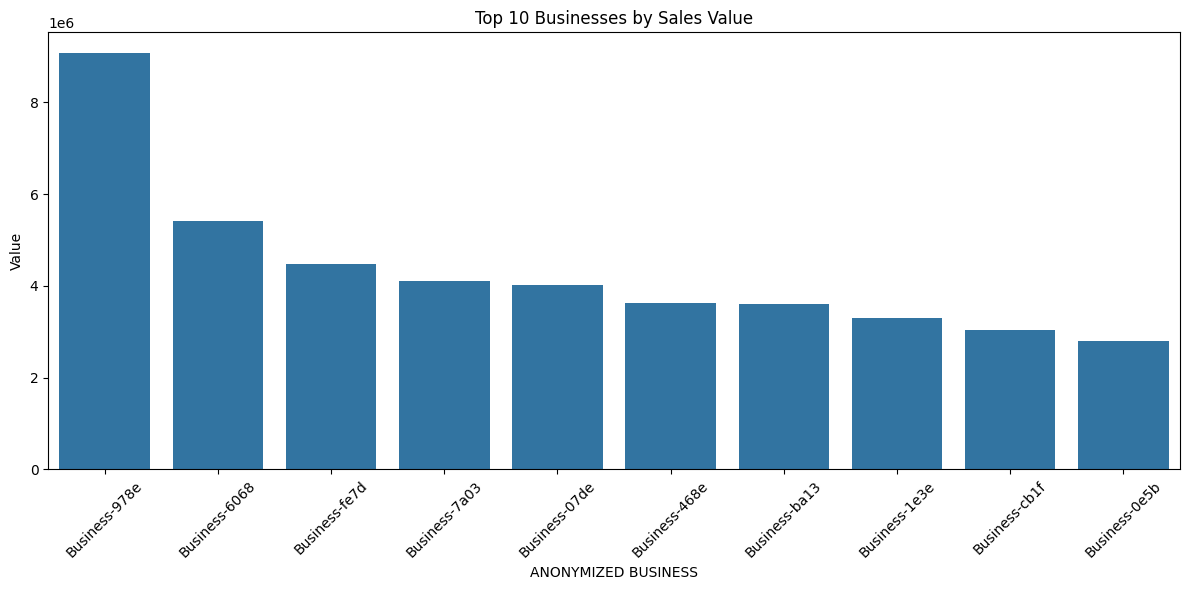

Top 10 Businesses by Sales:
                     QUANTITY      Value
ANONYMIZED BUSINESS                     
Business-978e           13991  9071832.0
Business-6068            8214  5421044.0
Business-fe7d            6743  4464899.0
Business-7a03            6318  4105376.0
Business-07de            6065  4023545.0
Business-468e            5450  3614724.0
Business-ba13            5533  3596794.0
Business-1e3e            4981  3302540.0
Business-cb1f            4636  3044026.0
Business-0e5b            4289  2794964.0


In [22]:
# Create bar plot for Business sales
plt.figure(figsize=(12, 6))
sns.barplot(data=business_sales.head(10), x=business_sales.head(10).index, y='Value')
plt.xticks(rotation=45)
plt.title('Top 10 Businesses by Sales Value')
plt.tight_layout()
plt.show()

print("\
Top 10 Businesses by Sales:")
print(business_sales.head(10))

In [23]:
business_summary = df.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Value', 'sum')
).reset_index()

### Trends Over time

#### Sales trends over time

In [24]:
# Time Series Analysis
monthly_sales = df.groupby('Month-Year').agg({
    'QUANTITY': 'sum',
    'Value': 'sum'
}).reset_index()



In [25]:
# Group by Month-Year
time_trends = df.groupby('Month-Year').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Value', 'sum')
).reset_index()

#### Time series plot

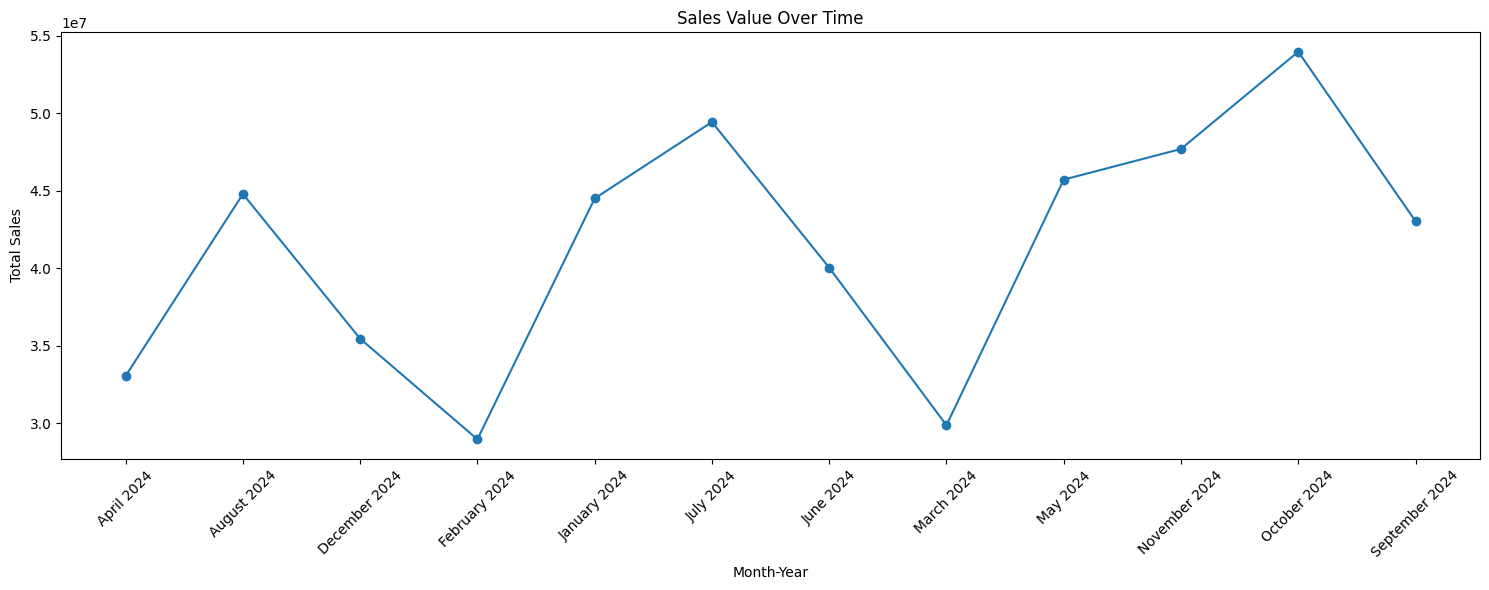

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Value'], marker='o')
plt.xticks(rotation=45)
plt.title('Sales Value Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

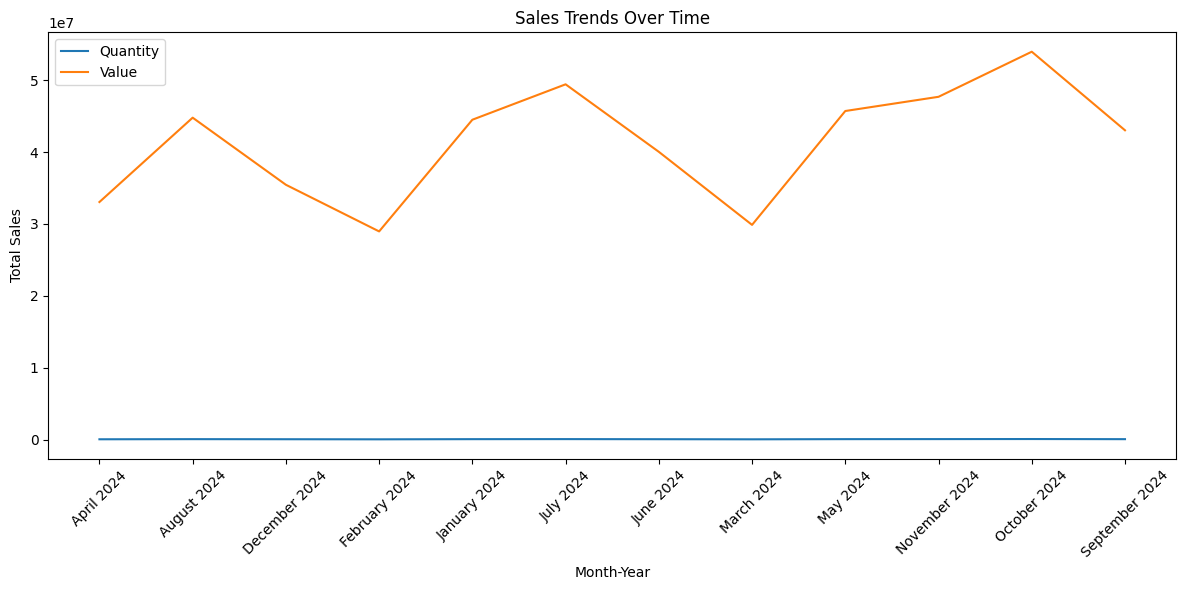

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_trends, x='Month-Year', y='Total_Quantity', label='Quantity')
sns.lineplot(data=time_trends, x='Month-Year', y='Total_Value', label='Value')
plt.title('Sales Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Observations:

Sales value and quantity sold dipped significantly in December, February and March.

A steady recovery in sales begins in March, indicating possible seasonal trends.

### Performance Analysis

#### Top 5 Most Frequently Purchased Products (Quantity)

In [28]:
top_products_quantity = df.groupby('ANONYMIZED PRODUCT').agg({
    'QUANTITY': 'sum'
}).sort_values('QUANTITY', ascending=False).head()


print("\
Top 5 Products by Quantity:")
print(top_products_quantity)



Top 5 Products by Quantity:
                    QUANTITY
ANONYMIZED PRODUCT          
Product-66e0           46957
Product-e805           42602
Product-8f75           37566
Product-29ee           35940
Product-4156           28487


In [29]:
top_products_quantity = df.groupby('ANONYMIZED PRODUCT').agg(
    Total_Quantity=('QUANTITY', 'sum')
).reset_index().sort_values(by='Total_Quantity', ascending=False).head(5)

print("Top 5 Most Frequently Purchased Products:\n", top_products_quantity)

Top 5 Most Frequently Purchased Products:
     ANONYMIZED PRODUCT  Total_Quantity
339       Product-66e0           46957
753       Product-e805           42602
477       Product-8f75           37566
128       Product-29ee           35940
214       Product-4156           28487


#### Top 5 Most Valuable Products (value)

In [30]:
top_products_value = df.groupby('ANONYMIZED PRODUCT').agg({
    'Value': 'sum'
}).sort_values('Value', ascending=False).head()


print("\Top 5 Products by Value:")
print(top_products_value)


\Top 5 Products by Value:
                         Value
ANONYMIZED PRODUCT            
Product-66e0        31132491.0
Product-e805        28245126.0
Product-8f75        24906258.0
Product-29ee        23828220.0
Product-4156        18886881.0


In [31]:
top_products_value = df.groupby('ANONYMIZED PRODUCT').agg(
    Total_Value=('Value', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(5)

print("Top 5 Most Valuable Products:\n", top_products_value)

Top 5 Most Valuable Products:
     ANONYMIZED PRODUCT  Total_Value
339       Product-66e0   31132491.0
753       Product-e805   28245126.0
477       Product-8f75   24906258.0
128       Product-29ee   23828220.0
214       Product-4156   18886881.0


#### Visualize Top Products

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\2734050897.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\2734050897.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


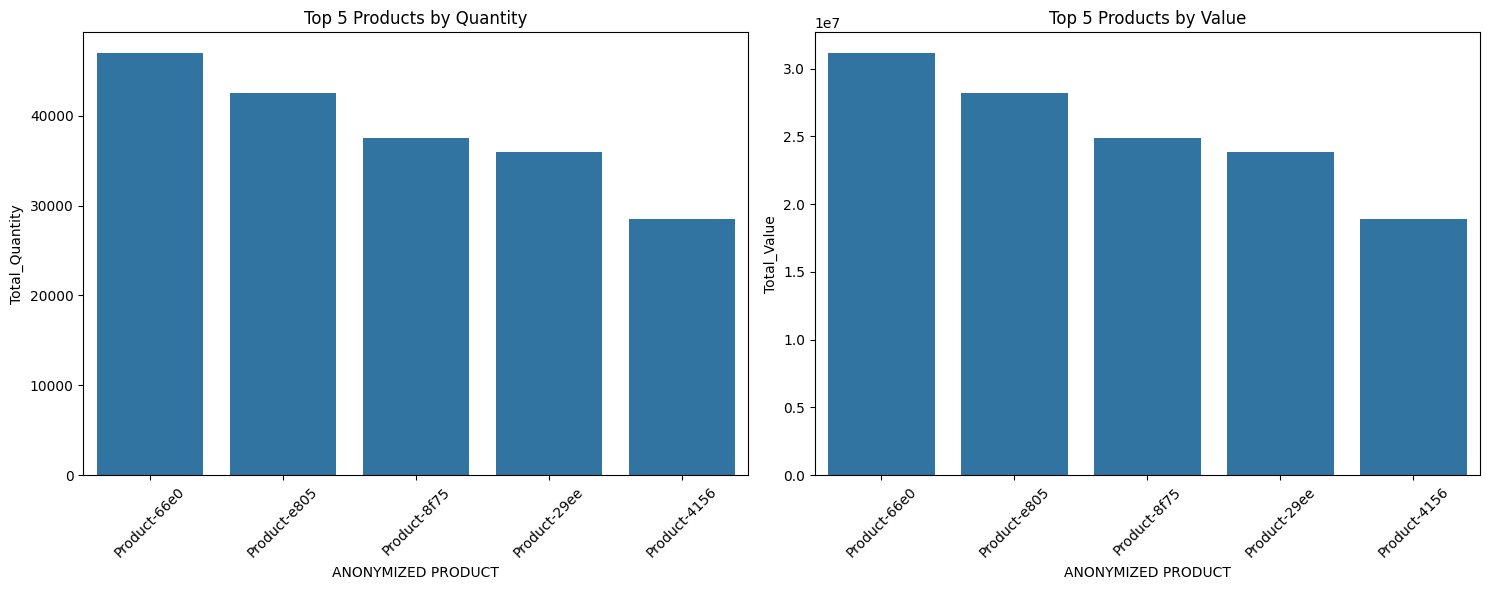

In [32]:
# Visualization for Top 5 Products by Quantity and Value
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=top_products_quantity, x='ANONYMIZED PRODUCT', y='Total_Quantity', ax=ax[0])
ax[0].set_title('Top 5 Products by Quantity')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(data=top_products_value, x='ANONYMIZED PRODUCT', y='Total_Value', ax=ax[1])
ax[1].set_title('Top 5 Products by Value')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Section 3: Advanced Analysis

### Customer Segmentation

#### A. Group data by business

In [33]:
# Let us aggregate data by business

business_segmentation = df.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Value', 'sum'),
    Frequency=('ANONYMIZED BUSINESS', 'count')
).reset_index()



In [34]:
# View segmented data

print(business_segmentation.head(10))

  ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency
0       Business-0000               8       4343.0          8
1       Business-0005               1        663.0          1
2       Business-0029              26      17238.0          6
3       Business-003d              98      48518.0         31
4       Business-0072             127      75443.0        101
5       Business-0078             317     205082.0        254
6       Business-007a               2       1326.0          2
7       Business-0086               6       4152.0          6
8       Business-00a2               9       5967.0          7
9       Business-00a7               5       3315.0          1


#### B. Classify businesses into segments

In [35]:
business_segmentation['Segment'] = pd.qcut(
    business_segmentation['Total_Value'], 
    q=3, 
    labels=['Low Value', 'Medium Value', 'High Value']
)



In [36]:
# View segmented data
print(business_segmentation.head(10))

  ANONYMIZED BUSINESS  Total_Quantity  Total_Value  Frequency       Segment
0       Business-0000               8       4343.0          8     Low Value
1       Business-0005               1        663.0          1     Low Value
2       Business-0029              26      17238.0          6  Medium Value
3       Business-003d              98      48518.0         31    High Value
4       Business-0072             127      75443.0        101    High Value
5       Business-0078             317     205082.0        254    High Value
6       Business-007a               2       1326.0          2     Low Value
7       Business-0086               6       4152.0          6     Low Value
8       Business-00a2               9       5967.0          7  Medium Value
9       Business-00a7               5       3315.0          1     Low Value


In [37]:
# Count the number of businesses in each segment
segment_summary = business_segmentation.groupby('Segment', observed=False).size().reset_index(name='Count')


print(segment_summary)

        Segment  Count
0     Low Value   1616
1  Medium Value   1584
2    High Value   1600


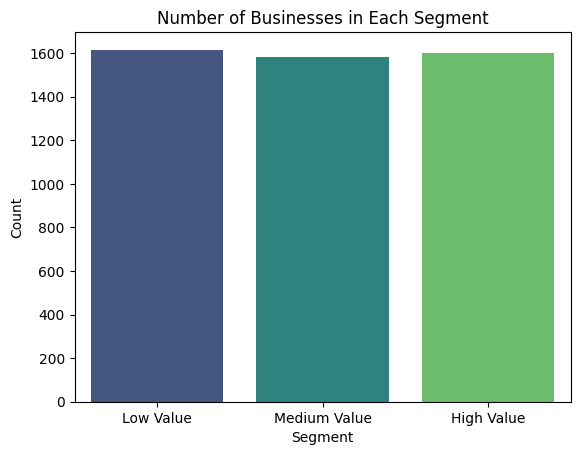

In [38]:
# segment distribution
sns.barplot(x='Segment', y='Count', hue='Segment', data=segment_summary, palette='viridis')  # Assign hue
plt.title('Number of Businesses in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Count')

plt.show()

#### C. Recommendations

Here are actionable strategies for each group:

1. High Value:
    
   These customers contribute the highest Total Value by spending the most amount of money and are the most profitable for the business.
    
   Therefore, consider offering loyalty programs, personalized services, and/or discounts for large purchases.
   
    
2. Medium Value:
    
   Medium Value customers have moderate spending levels and may represent untapped potential for increased revenue.

   Therefore, consider encouraging higher spending through bundled offers and/or targeted promotions.
   
    
3. Low Value:
    
   These customers contribute the least Total Value and/or purchase infrequently. However, there is much potential as this segment is untapped
    
   Therefore, focus on engagement to increase frequency and incentivize purchases with smaller rewards.

### Forecasting

#### Preparation of Time-Series data


In [39]:
# Ensure Month-Year is datetime by using to_datetime

df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%B %Y', errors='coerce')

# Group by Month-Year
time_series_data = df.groupby('Month-Year').agg(Total_Value=('Value', 'sum')).reset_index()

# Format the display to exclude the day
time_series_data['Month-Year'] = time_series_data['Month-Year'].dt.strftime('%B %Y')

# Set Month-Year as the index
time_series_data.set_index('Month-Year', inplace=True)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\4254213045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%B %Y', errors='coerce')


In [40]:

time_series_data.head()

,Total_Value
Month-Year,
January 2024,44501145.0
February 2024,28965782.0
March 2024,29874700.0
April 2024,33054163.0
May 2024,45714754.0


#### Arima Forecasting

In [41]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(time_series_data['Total_Value'], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast the next 3 months
forecast = model_fit.forecast(steps=3)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, fr

In [43]:
print("Forecasted Sales for the Next 3 Months:\n", forecast)

Forecasted Sales for the Next 3 Months:
 2025-01-01    4.042014e+07
2025-02-01    3.993990e+07
2025-03-01    3.998634e+07
Freq: MS, Name: predicted_mean, dtype: float64


#### Forecast Ploting

In [44]:
# Convert the historical data index to datetime
time_series_data.index = pd.to_datetime(time_series_data.index)

# Confirm index types
print("Historical Data Index Type (after conversion):", time_series_data.index.dtype)
print("Forecast Data Index Type:", forecast.index.dtype)

Historical Data Index Type (after conversion): datetime64[ns]
Forecast Data Index Type: datetime64[ns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20256\345189426.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data.index = pd.to_datetime(time_series_data.index)


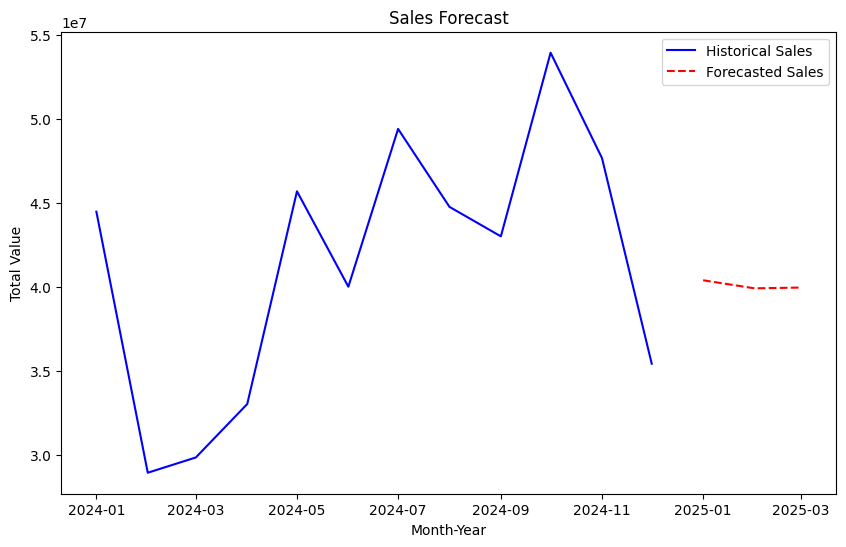

In [45]:
plt.figure(figsize=(10, 6))

# Plot historical sales
plt.plot(time_series_data, label='Historical Sales', color='blue')

# Plot forecasted sales
plt.plot(forecast, label='Forecasted Sales', linestyle='--', color='red')

# Add titles and labels
plt.title('Sales Forecast')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.legend()
plt.show()

In [46]:
# Combine historical and forecasted data
combined_data = pd.concat([time_series_data['Total_Value'], forecast], axis=0)

# Display the combined dataset
print(combined_data)

2024-01-01    4.450114e+07
2024-02-01    2.896578e+07
2024-03-01    2.987470e+07
2024-04-01    3.305416e+07
2024-05-01    4.571475e+07
2024-06-01    4.003725e+07
2024-07-01    4.942783e+07
2024-08-01    4.478819e+07
2024-09-01    4.303380e+07
2024-10-01    5.396331e+07
2024-11-01    4.769127e+07
2024-12-01    3.545402e+07
2025-01-01    4.042014e+07
2025-02-01    3.993990e+07
2025-03-01    3.998634e+07
dtype: float64


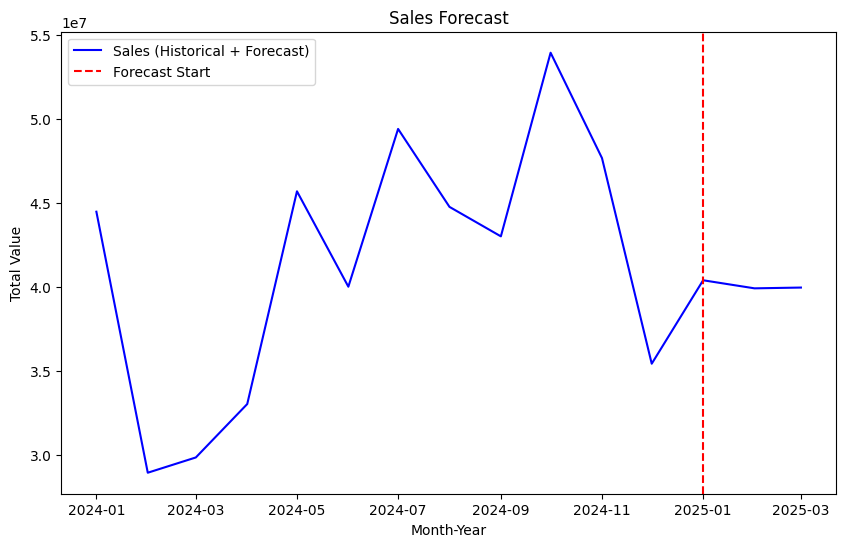

In [47]:
# Plot the combined data
plt.figure(figsize=(10, 6))
plt.plot(combined_data, label='Sales (Historical + Forecast)', color='blue')
plt.axvline(x=forecast.index[0], color='red', linestyle='--', label='Forecast Start')  # Mark forecast start
plt.title('Sales Forecast')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.legend()
plt.show()

### Anomally detection

#### Identify drops/spikes

##### Method 1: Using Z_score

In [48]:
from scipy.stats import zscore

# Calculate Z-scores for Total_Value
time_series_data['Z_Score'] = zscore(time_series_data['Total_Value'])

# Identify anomalies based on Z-scores
time_series_data['Anomaly_Z'] = time_series_data['Z_Score'].abs() > 2  

# Display anomalies
anomalies_z = time_series_data[time_series_data['Anomaly_Z']]
print("Anomalies Detected Using Z-Score:\n", anomalies_z)

Anomalies Detected Using Z-Score:
 Empty DataFrame
Columns: [Total_Value, Z_Score, Anomaly_Z]
Index: []


##### Anomaly Detection

Findings:

Using the initial method, no anomalies were detected.

#### Validation Using an Alternative Method:
To ensure the accuracy of our analysis, another method will be used to confirm the absence of anomalies. This step is critical to maintain the reliability and precision of our analysis.

##### Method 2: Using rolling mean and standard deviation

In [49]:
# Calculate rolling mean and standard deviation
time_series_data['Rolling_Mean'] = time_series_data['Total_Value'].rolling(window=3).mean()
time_series_data['Rolling_Std'] = time_series_data['Total_Value'].rolling(window=3).std()

# Identify anomalies 
time_series_data['Anomaly'] = (
    (time_series_data['Total_Value'] > time_series_data['Rolling_Mean'] + 2 * time_series_data['Rolling_Std']) |
    (time_series_data['Total_Value'] < time_series_data['Rolling_Mean'] - 2 * time_series_data['Rolling_Std'])
)



In [50]:

anomalies = time_series_data[time_series_data['Anomaly']]
print("Anomalies Detected:\n", anomalies)

Anomalies Detected:
 Empty DataFrame
Columns: [Total_Value, Z_Score, Anomaly_Z, Rolling_Mean, Rolling_Std, Anomaly]
Index: []


In [51]:
time_series_data['Rolling_Mean'] = time_series_data['Total_Value'].rolling(window=5).mean()
time_series_data['Rolling_Std'] = time_series_data['Total_Value'].rolling(window=5).std()

# Recalculate anomalies
time_series_data['Anomaly'] = (
    (time_series_data['Total_Value'] > time_series_data['Rolling_Mean'] + 2 * time_series_data['Rolling_Std']) |
    (time_series_data['Total_Value'] < time_series_data['Rolling_Mean'] - 2 * time_series_data['Rolling_Std'])
)
anomalies = time_series_data[time_series_data['Anomaly']]
print("Anomalies Detected with Larger Window:\n", anomalies)

Anomalies Detected with Larger Window:
 Empty DataFrame
Columns: [Total_Value, Z_Score, Anomaly_Z, Rolling_Mean, Rolling_Std, Anomaly]
Index: []


In [52]:
time_series_data['Anomaly'] = (
    (time_series_data['Total_Value'] > time_series_data['Rolling_Mean'] + 1.5 * time_series_data['Rolling_Std']) |
    (time_series_data['Total_Value'] < time_series_data['Rolling_Mean'] - 1.5 * time_series_data['Rolling_Std'])
)
anomalies = time_series_data[time_series_data['Anomaly']]
print("Anomalies Detected with Lower Threshold:\n", anomalies)

Anomalies Detected with Lower Threshold:
 Empty DataFrame
Columns: [Total_Value, Z_Score, Anomaly_Z, Rolling_Mean, Rolling_Std, Anomaly]
Index: []


The empty dataframe indicates that no anomalies were detected hence the visualization below.


#### Visualize anomalies

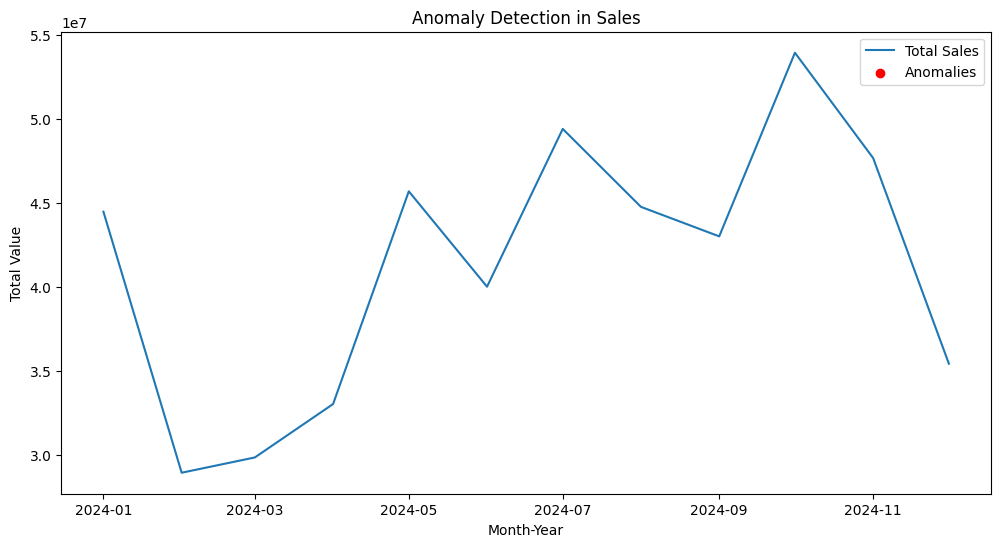

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Total_Value'], label='Total Sales')
plt.scatter(anomalies.index, anomalies['Total_Value'], color='red', label='Anomalies')
plt.title('Anomaly Detection in Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.legend()
plt.show()

The graph has indicates that there are no anomalies

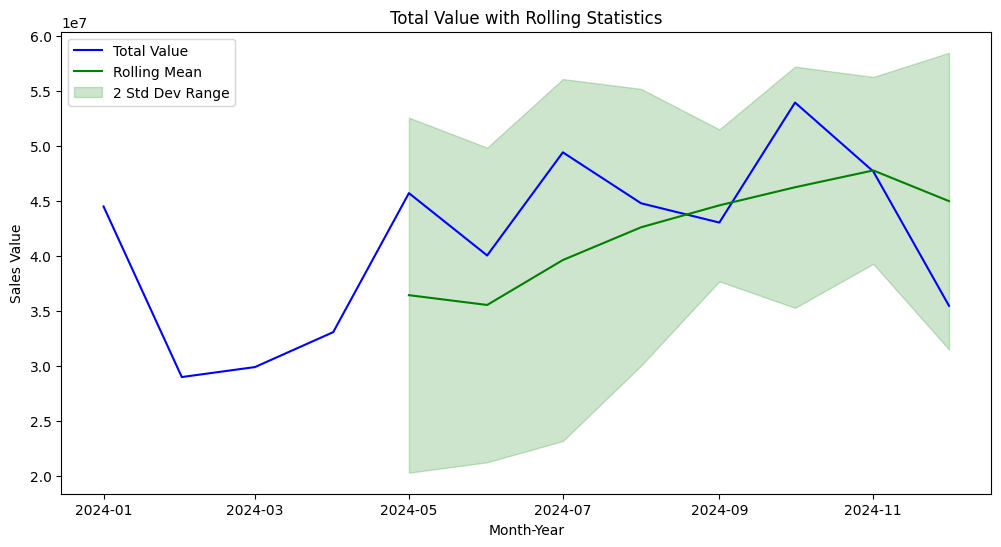

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Total_Value'], label='Total Value', color='blue')
plt.plot(time_series_data['Rolling_Mean'], label='Rolling Mean', color='green')
plt.fill_between(
    time_series_data.index, 
    time_series_data['Rolling_Mean'] - 2 * time_series_data['Rolling_Std'], 
    time_series_data['Rolling_Mean'] + 2 * time_series_data['Rolling_Std'], 
    color='green', alpha=0.2, label='2 Std Dev Range'
)
plt.title('Total Value with Rolling Statistics')
plt.xlabel('Month-Year')
plt.ylabel('Sales Value')
plt.legend()
plt.show()

##### Anomaly Detection

Findings and Conclusion:

Initial Analysis: No anomalies were detected in the data using the first method.
    
Validation Using Rolling Mean Analysis:
A line graph comparing the rolling mean and actual values indicates that both the rolling mean and the standard deviation are well within the expected range. This confirms that there are no significant anomalies in the sales data.
This consistency across methods strengthens the reliability of the analysis, ensuring accurate insights for decision-making.

### Correlation Analysis

#### Examine the relationships

In [55]:
# Correlation analysis
correlation = df[['QUANTITY', 'Value']].corr()




In [56]:
print("Correlation between Quantity and Value:\n", correlation)

Correlation between Quantity and Value:
           QUANTITY    Value
QUANTITY   1.00000  0.98496
Value      0.98496  1.00000


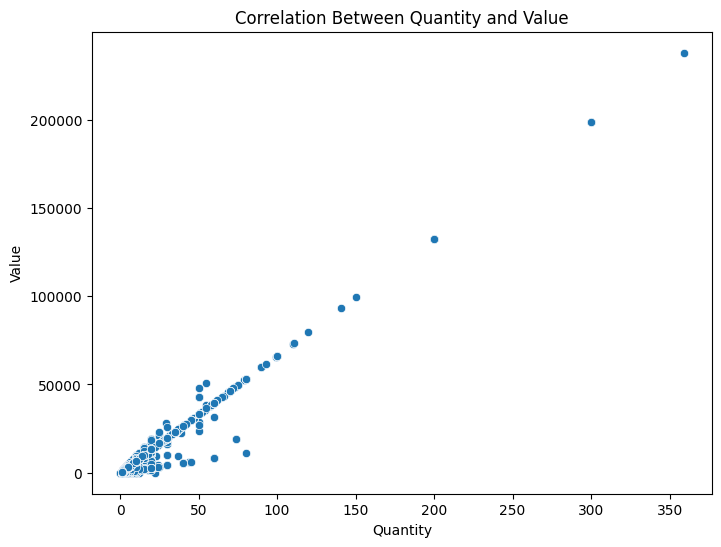

In [57]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='QUANTITY', y='Value')
plt.title('Correlation Between Quantity and Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

#### Insights

Key Insights:
    
Correlation Coefficient (0.98496):

There is very strong positive linear relationship between QUANTITY and Value.
This means that as the quantity of items purchased increases, the total value of sales also increases proportionally.

Scatter Plot:

The scatter plot shows points clustering along an upward-sloping line, reinforcing the strong positive correlation.

What does this Imply?

The strong correlation implies that Value (total sales) is largely determined by QUANTITY (number of items sold). This is expected in cases where the price per unit is relatively consistent across transactions.

Impact on Sales Performance:
To drive higher sales (Value), increasing the QUANTITY sold is critical. Strategies that boost the volume of transactions, such as discounts for bulk purchases or promotions, could have a significant impact.

## Section 4: Strategic Insights and Recommendations

#### Product Strategy

In [58]:
# Aggregating the data by product category
category_performance = df.groupby('ANONYMIZED CATEGORY').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Value', 'sum')
).reset_index()

# Revenue per Unit (Total Value / Total Quantity)
category_performance['Revenue_Per_Unit'] = category_performance['Total_Value'] / category_performance['Total_Quantity']

# Sorting the categories by Total Value to identify high-value categories
category_performance_sorted = category_performance.sort_values(by='Total_Value', ascending=False)



# Top categories based on Total Value and Revenue per Unit
top_categories = category_performance_sorted.head(10)


print(top_categories)


   ANONYMIZED CATEGORY  Total_Quantity  Total_Value  Revenue_Per_Unit
18        Category-120          169715  112662251.0        663.832018
25         Category-75          151330  100332150.0        663.002379
0         Category-100           76824   51108423.0        665.266362
26         Category-76           71719   47542538.0        662.900180
17        Category-119           68332   45304116.0        663.000000
27         Category-77           28455   18851079.0        662.487401
40         Category-94           23670   16751684.0        707.717955
34         Category-85           22997   15746016.0        684.698700
38         Category-91           20853   13195035.0        632.764350
1         Category-101           19585   13034230.0        665.521062


I recommend prioritizing Product "Category-120"  for marketing campaigns, as it has the highest total quantity(169,715) and value ($ 112,662,251), indicating strong customer demand and sales potential.

This category shows consistent demand and high revenue potential averaging $ 663.832018/ unit , making it ideal for targeted promotions.

#### Customer Retention

##### Identify businesses with reduced customer frequency

In [60]:
# Group by business and analyze purchase frequency over time
purchase_trends = df.groupby(['ANONYMIZED BUSINESS', 'Month-Year']).agg(
    Monthly_Transactions=('QUANTITY', 'sum')
).reset_index()

# Calculate the difference in transaction frequency
purchase_trends['Transaction_Change'] = purchase_trends.groupby('ANONYMIZED BUSINESS')['Monthly_Transactions'].diff()

# Identify businesses with reduced frequency and calculate total reduction
reduced_frequency = (
    purchase_trends[purchase_trends['Transaction_Change'] < 0]
    .groupby('ANONYMIZED BUSINESS')['Transaction_Change']
    .sum()
    .reset_index()
)

# Sort by the largest reduction in frequency
reduced_frequency = reduced_frequency.sort_values(by='Transaction_Change', ascending=True)

# Select the top 10 businesses
top_10_reduced_frequency = reduced_frequency.head(10)

# Display the top 10 businesses
print("Top 10 Businesses with Reduced Customer Frequency:\n", top_10_reduced_frequency)

Top 10 Businesses with Reduced Customer Frequency:
      ANONYMIZED BUSINESS  Transaction_Change
1714       Business-978e             -2034.0
2803       Business-fe7d             -1773.0
73         Business-07de             -1589.0
794        Business-468e             -1494.0
1483       Business-8119             -1227.0
2265       Business-cb1f             -1180.0
1981       Business-b22c             -1161.0
1871       Business-a8bd             -1118.0
367        Business-2197             -1065.0
190        Business-1371             -1023.0


Strategies to Re-engage These Customers:
    
1. Personalized Offers: 
    - Send emails or messages offering discounts or special deals tailored to these businesses.
    
2. Feedback Collection: 
     - Conduct surveys to understand their reduced purchase frequency and address concerns.
     
3. Loyalty Programs: 
    - Offer rewards for consistent purchases to incentivize frequent transactions.
    - Provide exclusive previews of new products or services to rekindle interest.

#### Operational Efficiency

##### Insights from Trends in Product Performance and Seasonal Demand:
##### Analyze Product Trends:
Identify products with fluctuating demand across seasons.(In my case I identified products with high Seasonal demands)

In [61]:
# Group data by Month-Year and Product
product_monthly = df.groupby(['Month-Year', 'ANONYMIZED PRODUCT']).agg({
    'QUANTITY': 'sum',
    'Value': 'sum'
}).reset_index()

# Calculate stats for products
product_stats = product_monthly.groupby('ANONYMIZED PRODUCT').agg({
    'QUANTITY': ['mean', 'std'],
    'Value': ['mean', 'std']
}).reset_index()

product_stats.columns = ['Product', 'Avg_Quantity', 'Std_Quantity', 'Avg_Value', 'Std_Value']
product_stats['Quantity_CV'] = product_stats['Std_Quantity'] / product_stats['Avg_Quantity']
product_stats['Value_CV'] = product_stats['Std_Value'] / product_stats['Avg_Value']

# Identify high-seasonality products
seasonal_products = product_stats[(product_stats['Quantity_CV'] > 1.5) | (product_stats['Value_CV'] > 1.5)]

print("Products with High Seasonal Demand:")
print(seasonal_products.head())

Products with High Seasonal Demand:
          Product  Avg_Quantity  Std_Quantity     Avg_Value     Std_Value  \
32   Product-0c22      9.800000      9.038805   3840.000000   7061.734914   
99   Product-1f72     80.666667    130.270232    528.000000    610.343346   
102  Product-1ff0     44.888889     91.070638  29761.333333  60379.833014   
118  Product-2418     21.333333     34.355980  11220.000000  18032.670351   
261  Product-4d7b     10.600000     19.269146   4884.800000   7397.287388   

     Quantity_CV  Value_CV  
32      0.922327  1.838993  
99      1.614920  1.155953  
102     2.028801  2.028801  
118     1.610437  1.607190  
261     1.817844  1.514348  


Recommendations for Inventory Management and Supply Chain:
    
1. Seasonal Demand Planning:
    - Use historical data to predict seasonal trends and adjust procurement schedules accordingly to avoid overstocking or stockouts.
    
    - Improve inventory forecasting for seasonal products to avoid stockouts or overstocking.

2. Real-time Inventory Tracking:
    - Implement inventory systems that provide live updates on stock levels for popular products.

3. Supplier Collaboration:
    - Establish flexible contracts with suppliers to quickly adjust stock levels based on seasonal fluctuations.
    - Align supply chain processes to ensure timely delivery during peak demand periods.
    
4. Focus on Top Products:
    - Prioritize high-value, high-demand products for inventory replenishment and streamline logistics to ensure their availability.



 
    

#### Brief Summary of Recommendations

1. Product Strategy: 

    Prioritize the top-performing product category  "Category-120" for marketing campaigns, leveraging its strong contribution to revenue.
    
    
2. Customer Retention: 

    Re-engage businesses with declining purchase frequency ("Business-978e" among others) using personalized offers, loyalty programs, and feedback mechanisms.
    
    
3. Operational Efficiency: 

    Optimize inventory and supply chain processes based on seasonal trends and high-performing products, such as product "Product-0c22" among the aforelisted, to ensure availability and minimize costs.

## Section 5: Dashboard and Reporting

## Dashboard Insights Report
### Overview
This dashboard summarizes key insights from the sales data, focusing on:

1. Total Quantity and Sales Value.
2. Top-Performing Categories, Products, and Businesses.
3. Sales Trends Over Time.
4. Customer Segmentation by Value and Quantity.


#### Total Quantity and Value by Anonymized Category.

Findings:

Total Quantity: 766,000 units.
Total Sales Value: 497 million.

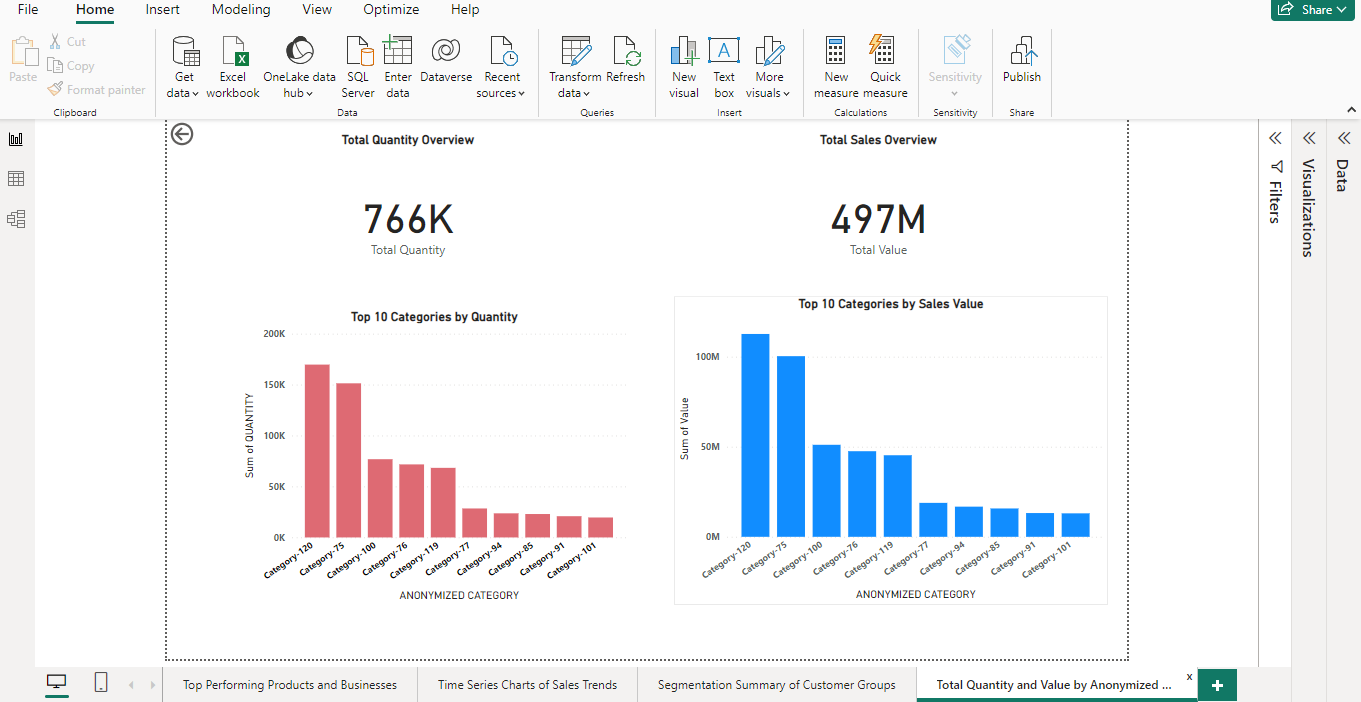

Bar Charts:

a. Top Categories by Quantity Sold:
Category-120 is the leader with 170,000 units sold.

b. Top Categories by Sales Value:
Category-120 again leads with 113 million in sales value.

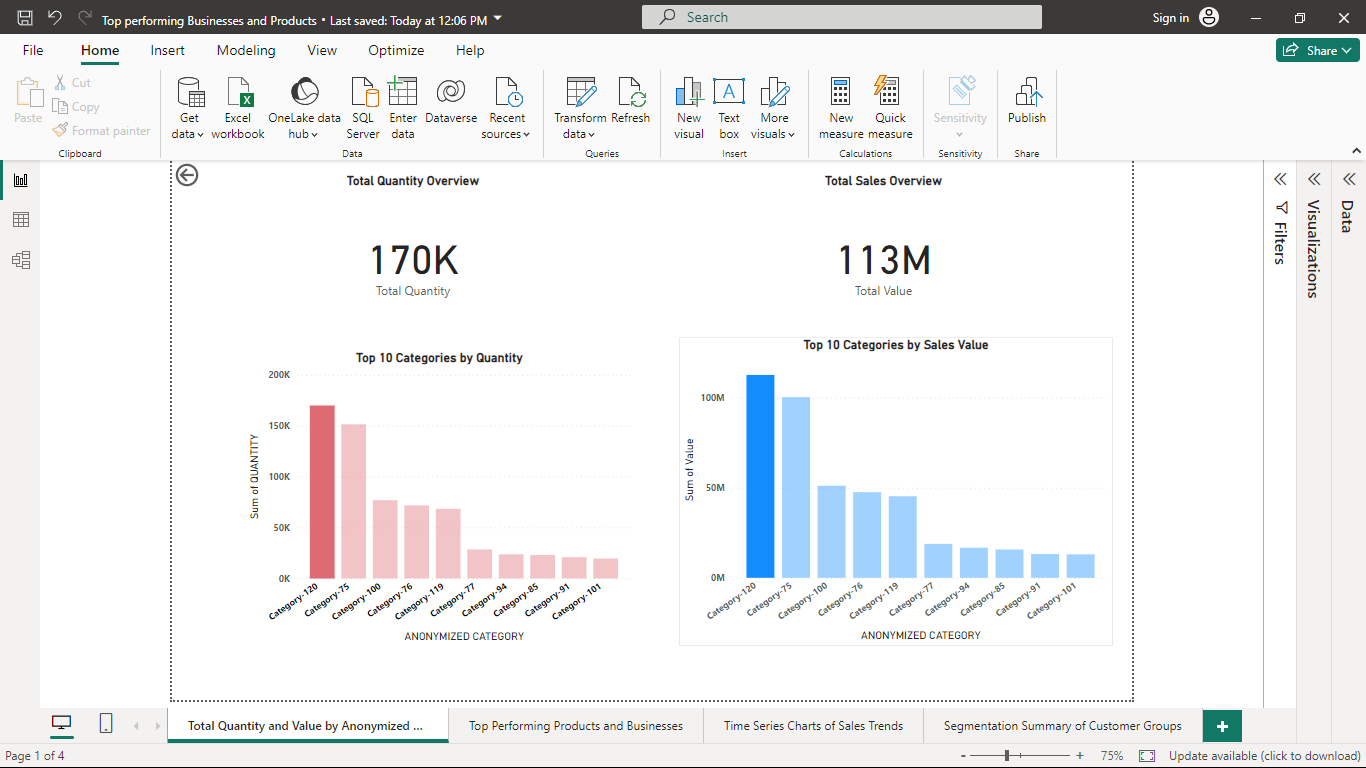

#### Top-performing products and businesses.

Two bar charts showcasing:

Top 10 Products by Sales Value:
Product-66e0 is the best-performing product, contributing 31 million in sales.

Top 10 Businesses by Sales Value:
Business-978e is the best-performing business, generating 9 million in sales.

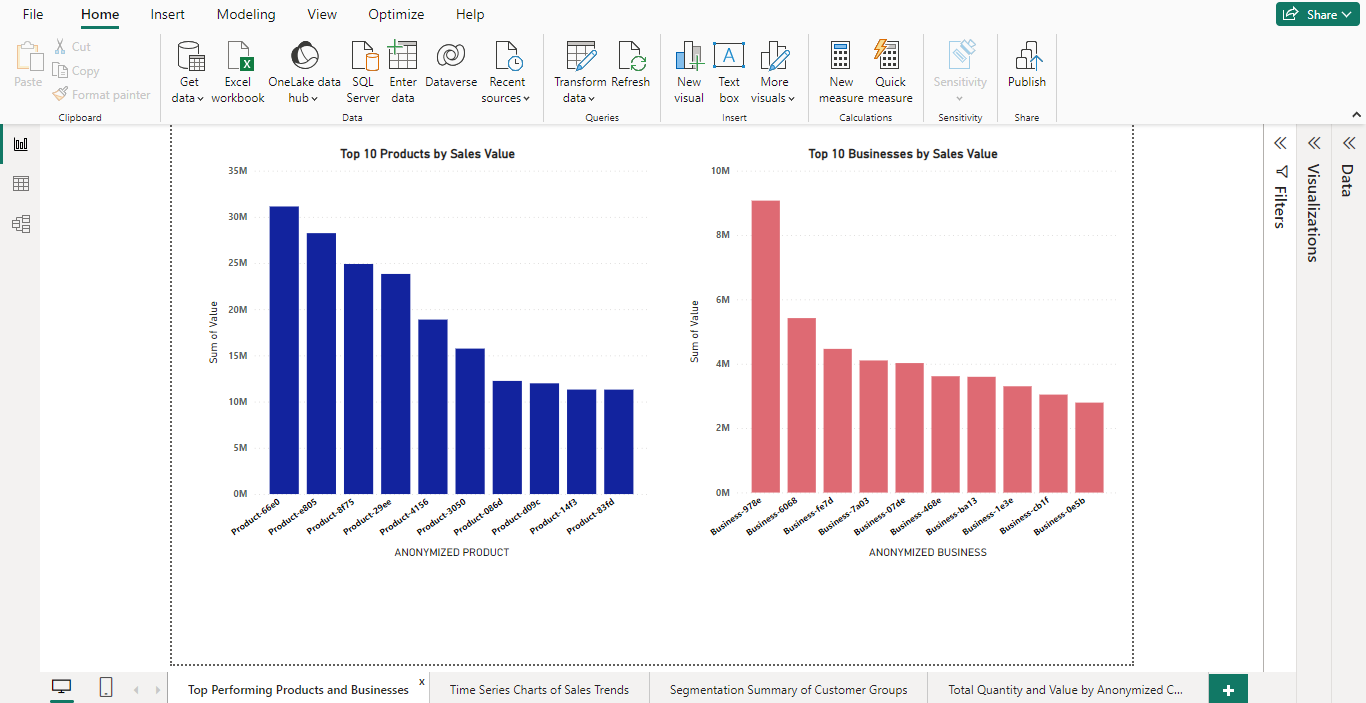

#### Sales trends Over Time.



a. Combined Line Chart: Shows sales value and quantity sold trends over time.
    
b. Individual Line Charts:
    
1. Sales Value Over Time:
    
The highest sales value occurred in October (54 million).
The lowest sales value occurred in February (29 million).

2. Quantity Sold Over Time:
    
The highest quantity sold occurred in October (85,000 items).
The lowest quantity sold occurred in February (44,000 items).

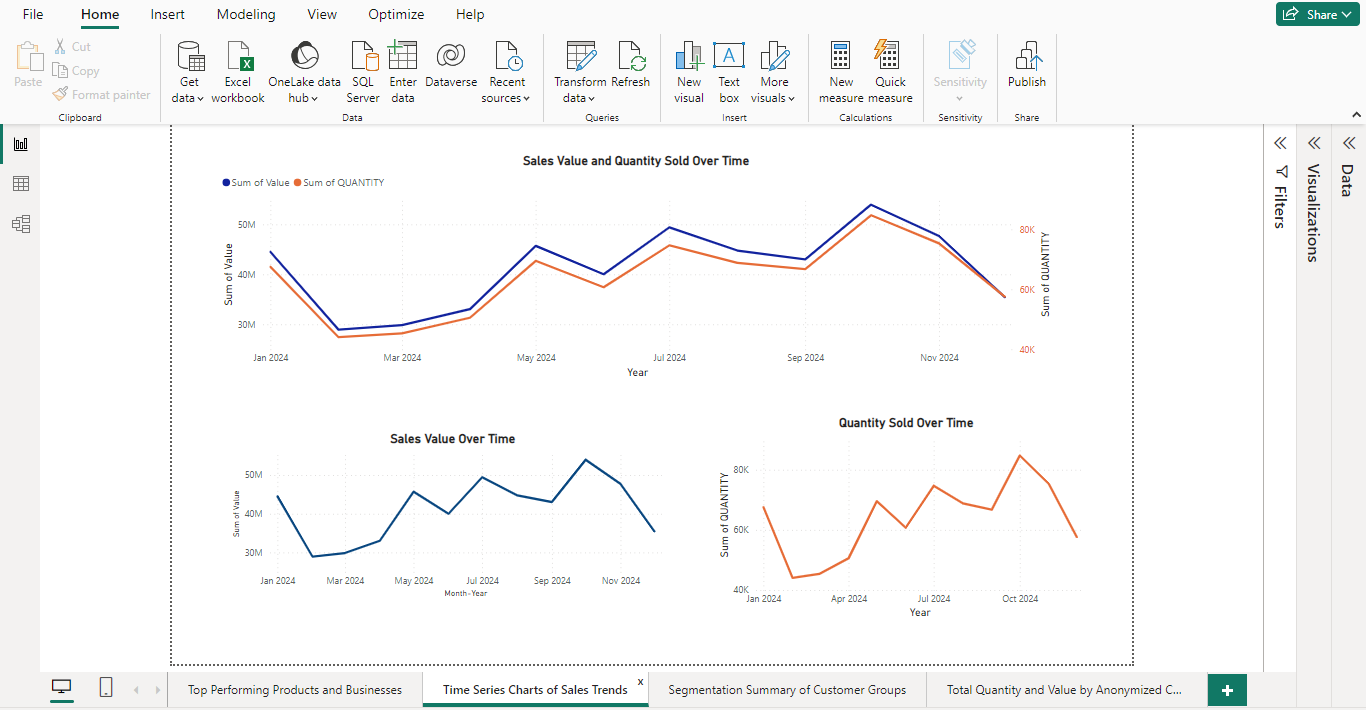

Key Observations:

Sales value and quantity sold dipped significantly in December and March.

A steady recovery in sales begins in late March, indicating possible seasonal trends.


#### Customer Segmentation.


Three pie charts illustrating customer segmentation:

a. Distribution by Customer Group:

High Value: 1,630 businesses (34%).
Medium Value: 1,550 businesses (32.33%).
Low Value: 1,620 businesses (33.67%).

b. Revenue Contribution by Group:

High Value: 469 million (94.52%).
Medium Value: 24 million (4.81%).
Low Value: 33 million (0.66%).

c. Quantity Sold by Group:

High Value: 722,000 units (94.3%).
Medium Value: 38,000 units (5%).
Low Value: 5,300 units (0.7%).

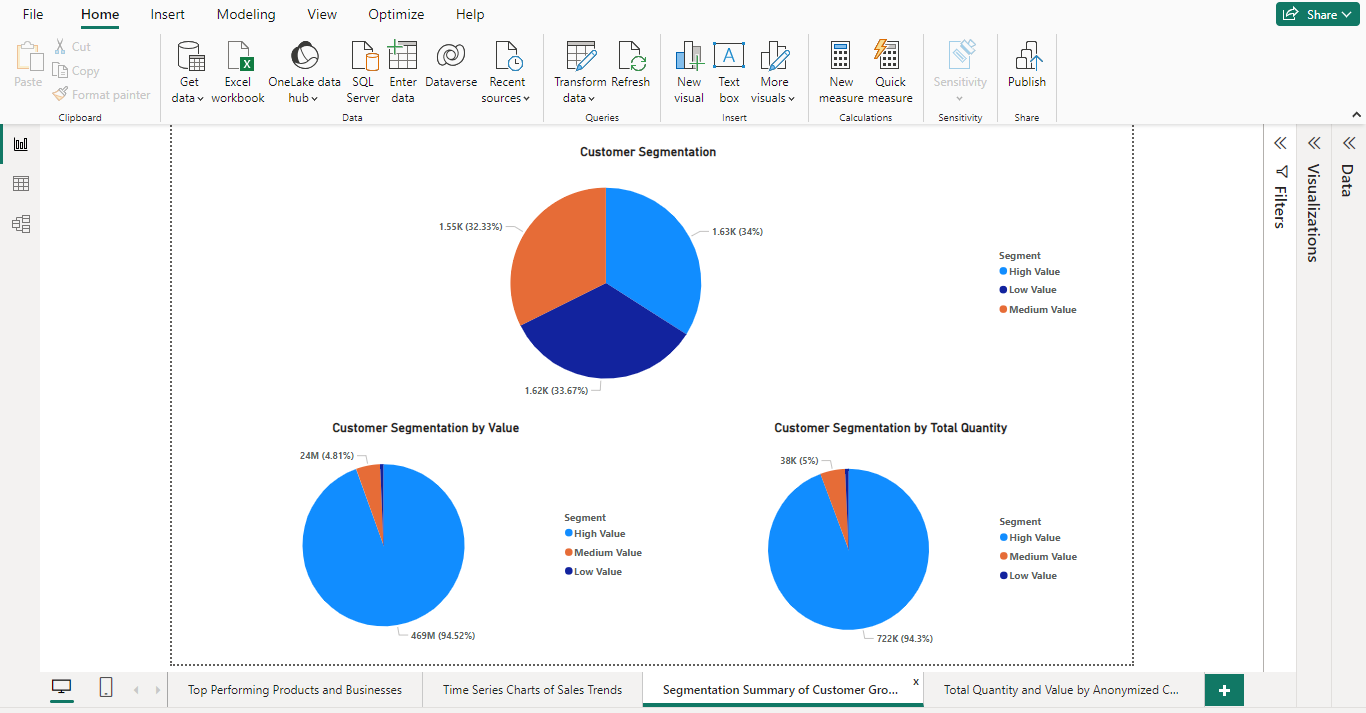

Key Observations:

While high-value customers represent only 34% of total businesses, they contribute a staggering 94.52% of total revenue and 94.3% of total quantity sold.

Medium and low-value customers account for minimal revenue and sales quantity, highlighting the importance of retaining and nurturing high-value customers.

 ### Conclusion
    
The Power BI dashboard effectively summarizes the performance of categories, products, businesses, and customer segments. Key recommendations include:

Focus marketing and retention strategies on high-value customers who drive the majority of revenue.
Address the seasonal dip in sales observed in November and December through targeted promotions or campaigns.
Leverage the success of Category-120 and Product-66e0 by expanding their availability or promoting complementary products.

## Bonus Section

### 1. Predictive Analysis: External Factors Influencing Sales

External factors often play a huge role in shaping sales performance. Some of these factors include: 

1. Economic Conditions:
GDP growth, inflation, unemployment rates, or consumer confidence indexes usually affect spending habits.

2. Competitor Actions:
Pricing strategies, product launches, and marketing campaigns by competitors do influence a shift into consumer preferences.

3. Seasonality:
Holiday periods, weather patterns, or cultural events may drive seasonal sales trends.

4. Regulatory Changes:
New government policies, tariffs, or tax adjustments could impact supply chain costs and consumer prices.

5. Industry Trends:
Consumer preferences for sustainability or new technology trends could drive or reduce demand.


#### Proposed Methodology

To incorporate these external factors into future analyses:

1. Data Collection:

Gather data from external sources, such as government economic reports, competitor pricing data, and industry trend analyses.
APIs like Google Trends, World Bank, or Statista can be valuable sources.

2. Feature Engineering:

Create features representing these factors, such as inflation rate, competitor prices, or seasonal indices.
Categorical encoding among other methods can be used for qualitative data for instance to check competitor actions.
By effectively encoding competitor actions, you can gain valuable insights into the competitive landscape and make more informed business decisions.

3. Integration with Internal Data:

Merge external data with the internal dataset based on time, for instance, Month-Year or geography, so as to know seasons and to enable preplanning.

Rationale:

By incorporating external factors data that exhibit seasonality (weather patterns, holiday schedules, economic cycles), we can:

Identify Seasonal Trends: Analyze how external factors correlate with sales fluctuations, uncovering predictable patterns.
Improve Forecasting Accuracy: Incorporate seasonal influences into forecasting models for more accurate sales predictions.
Optimize Inventory and Production: Adjust inventory levels and production schedules to align with anticipated seasonal demand.

4. Model Development:

Use regression models (e.g., Linear Regression, Random Forest, or XGBoost) to analyze the relationship between external factors and sales.

Include interaction terms to capture combined effects (e.g., seasonality and competitor pricing).

5. Scenario Analysis:

Build a simulation model to forecast sales under different external conditions. For instance, "What if inflation increases by 2%?").


###  2. Scalability: Handling Larger Datasets

If the dataset were 10 times larger, efficient data storage, processing, and analysis would be essential. Here is how to optimize:

##### Data Storage

1. Use a Database Management System:

Store the dataset in a relational database (e.g., PostgreSQL, MySQL) or a cloud-based database (e.g., AWS RDS, Google BigQuery).
Partition the data by time (e.g., Year-Month) for faster querying.

2. Compression:

Use data compression techniques to reduce storage size, especially for text-heavy or redundant columns.

##### Data Processing

1. Distributed Computing:

Use frameworks like Apache Spark or Dask to handle large-scale data processing in parallel.

2. Incremental Processing:

Process data in batches or chunks instead of loading the entire dataset into memory.

3. Efficient File Formats:

Convert CSVs to columnar storage formats like Parquet or ORC for faster reads and writes. 

#####  Analysis Optimizations

1. Aggregations: 

Perform pre-aggregations during data preparation to reduce the volume of data processed in visualizations or models.
For example, calculate monthly totals and store those instead of analyzing raw transaction data.

2. Sampling:

Use representative sampling for exploratory analysis to reduce computational load.

3. Indexing:

Create indexes on frequently queried columns (e.g., Date, Category) to speed up filtering and grouping operations.

##### Tools to Use

1. Cloud Services: AWS S3 for storage, AWS EMR for processing.
2. Big Data Tools: Apache Spark for distributed processing and analysis.
3. Visualization Tools: Power BI or Tableau integrated with databases for efficient querying.

### Conclusion

Predictive Analysis: Incorporating external factors enriches the context of sales trends and enables more accurate forecasts.

Scalability: Employing distributed systems, efficient storage formats, and pre-aggregations ensures smooth handling of larger datasets without compromising performance.